In [36]:
import pandas as pd
from sklearn.datasets import load_iris

try:
    iris = load_iris()
    
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    
    df['target'] = iris.target
    
    print('Iris dataset succesfully loaded.')
except Exception as e:
    print('Error loading dataset: {e}')

Iris dataset succesfully loaded.


In [34]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,date
0,5.1,3.5,1.4,0.2,setosa,2025-05-01
1,4.9,3.0,1.4,0.2,setosa,2025-05-02
2,4.7,3.2,1.3,0.2,setosa,2025-05-03
3,4.6,3.1,1.5,0.2,setosa,2025-05-04
4,5.0,3.6,1.4,0.2,setosa,2025-05-05


In [9]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [11]:
df_cleaned = df.dropna()

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.groupby('species', observed=True).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


Iris dataset successfully loaded.


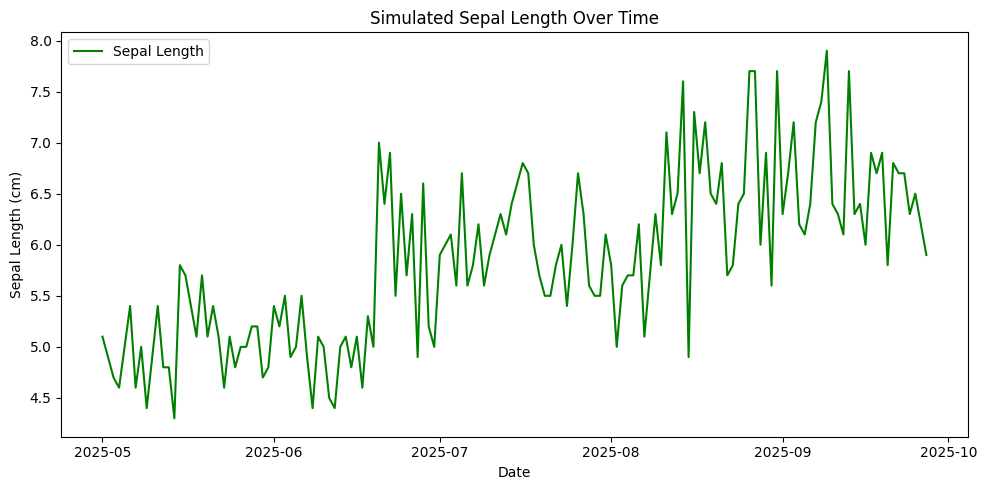

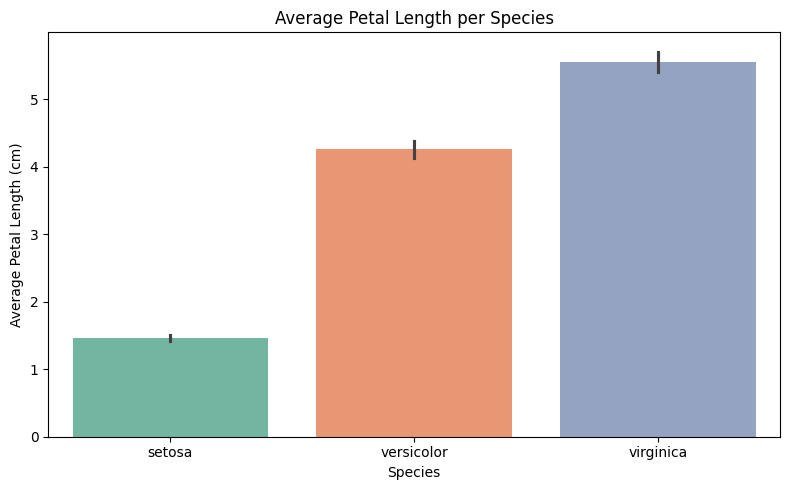

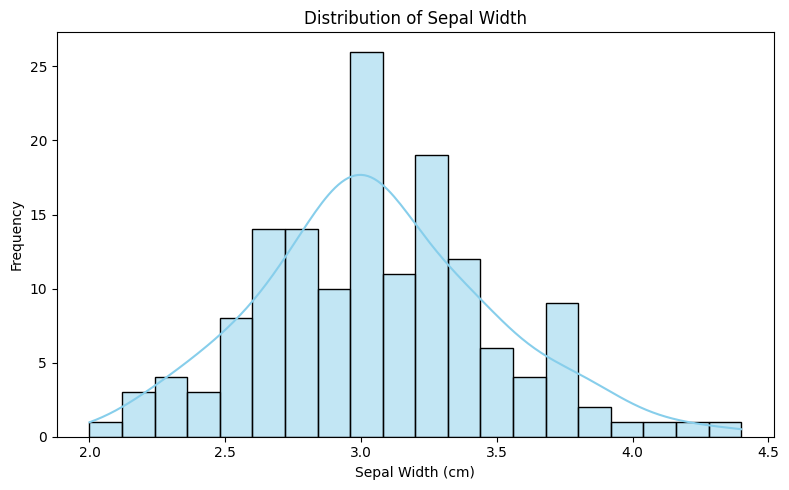

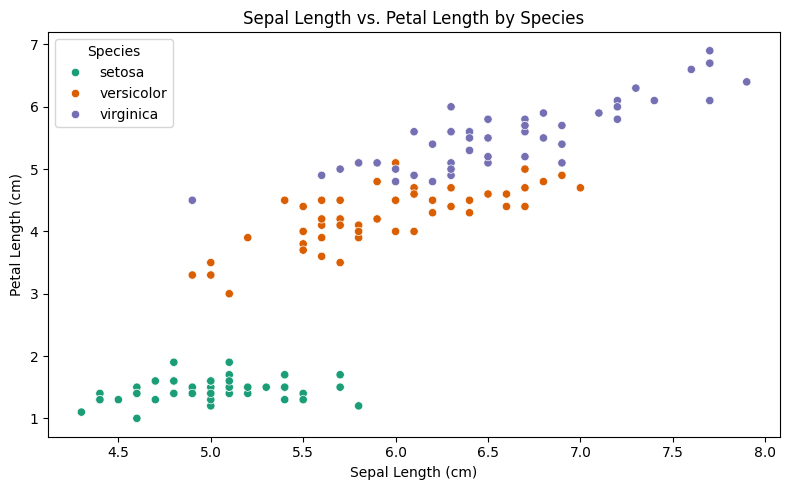

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

    # Simulating date since iris dataset has no time
    df['date'] = pd.date_range(start='2025-05-01', periods=len(df), freq='D')

    print('Iris dataset successfully loaded.')
except Exception as e:
    print('Error loading dataset {e}')

# Line Chart
try: 
    plt.figure(figsize=(10, 5))
    plt.plot(df['date'], df['sepal length (cm)'], label='Sepal Length', color='green')
    plt.title('Simulated Sepal Length Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sepal Length (cm)')
    plt.legend()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Error plotting line chart: ${e}')

# Bar Chart
try:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='species', y='petal length (cm)', hue='species', palette='Set2', legend=False)
    plt.title('Average Petal Length per Species')
    plt.xlabel('Species')
    plt.ylabel('Average Petal Length (cm)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Error plotting bar chart: ${e}')

# Histogram
try:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['sepal width (cm)'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Sepal Width')
    plt.xlabel('Sepal Width (cm)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Error plotting histogram: ${e}')

# Scatter Plot
try:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='Dark2')
    plt.title('Sepal Length vs. Petal Length by Species')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.legend(title='Species')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Error plotting scatter plot: ${e}')


# Patterns and Findings

- Virginica has the longest petals.
- Setosa has shorter petals compared to the other species.
- Versicolor typically lies between Setosa and Virginica.
- There is a higher concentration of Setosa species around the higher end of sepal width which could help in identification.
- Setosa is tightly grouped in the bottom left of the scatter plot while Virginica is concetrated at the top. This shows that sepal and petal lengths are correlated.
